<a href="https://www.kaggle.com/code/mbhosseini70/tehran-house-price-prediction?scriptVersionId=146512264" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

# This introductory section provides a clear overview of the Tehran, Iran House Price Regression Project.


# This project focuses on predicting house prices in Tehran, Iran, measured in Rial currency.
# It involves several key steps to achieve accurate price predictions:



# 1. Installing and Importing Necessary Libraries



# 2. Data Loading, Exploration, and Preprocessing

#     This step is crucial for data preparation. Here, we load the data, explore its characteristics, and perform essential preprocessing tasks.
    
#    - Data is loaded and explored to understand its structure.
#    - Basic statistics are generated to gain insights.
#    - Visualizations are created, including histograms, pie charts, and correlation matrices, to visualize data distributions and relationships.
#    - Missing values are handled to ensure data completeness.
#    - Outliers are identified and removed to improve model accuracy.
#    - Data types are converted as needed for analysis.

# 3. Modeling with PyCaret

#    - PyCaret, a low-code ML library, is used to quickly compare various regression models.
#    - This step provides an initial overview of the expected model performance.

# 4. Manual Modeling

#     In this section, we move beyond PyCaret to manually define and train specific regression models, giving our more control and flexibility.

#    - we mention specific models like RandomForest, XGBoost, CatBoost, and LGBM, which indicates the depth of your analysis.
#    - Hyperparameter Tuning is introduced as an important substep, highlighting your commitment to optimizing model performance.

# 5. Model Evaluation

# Proper model evaluation is critical. Here, we explain how models will be assessed and results saved.

#    - Models with the best parameters (obtained through Hyperparameter Tuning) are thoroughly evaluated.
#    - Evaluation metrics such as RMSE, MAE, R2, and training times are used to assess model performance.
#    - Results are not only presented but also stored in Wandb for future reference.

# 6. Save the Model



# 1- Installing and Importing the libraries

In [2]:
# Install necessary libraries
!pip install pycaret
#!pip install autoviz
!pip install wandb -qu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 23.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 52.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 59.8 MB/s eta 0:00:0000:0100:01
     ━

In [3]:
# Import required libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


import joblib

from pycaret.regression import *
from pycaret import *


import wandb


from tqdm.auto import tqdm



import warnings
warnings.filterwarnings('ignore')

# 2- Data Loading, Exploration and Preprocessing

In [4]:
# Load the dataset and display the top 5 samples
df = pd.read_csv('/kaggle/input/house-price-tehran-iran/housePrice.csv')
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1024,220,3,True,True,True,Elahieh,3.520000e+10,1173333.33
1203,72,2,True,True,False,Southern Janatabad,2.113000e+09,70433.33
490,54,1,True,True,True,Jeyhoon,1.500000e+09,50000.00
2120,115,2,True,True,True,Central Janatabad,4.870000e+09,162333.33
1785,150,3,True,True,True,Ekhtiarieh,9.500000e+09,316666.67


## Explore the data (EDA) and have Preprocessing

In [5]:
# Displaying column names
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [6]:
# Displaying dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [7]:
# Displaying statistical summary
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [8]:
# Dropping 'Price(USD)' column
df = df.drop("Price(USD)", axis=1)

In [9]:
# Cleaning the 'Area' column and converting it to numeric type
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [10]:
# Set display option for floats
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))

In [11]:
# Displaying count of missing values for each column
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64

In [12]:
# I will drop missing values although it is not necessary because used models can manage missing values.
df.dropna(inplace=True)

In [13]:
# Displaying dataset information after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3456 non-null   int64  
 1   Room       3456 non-null   int64  
 2   Parking    3456 non-null   bool   
 3   Warehouse  3456 non-null   bool   
 4   Elevator   3456 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3456 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 145.1+ KB


In [14]:
# Displaying random 5 samples
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
2305,65,2,True,True,False,West Ferdows Boulevard,"2,200,000,000"
1325,103,2,True,True,True,Saadat Abad,"5,700,000,000"
1452,113,2,True,True,True,Persian Gulf Martyrs Lake,"3,800,000,000"
1600,101,2,True,True,True,Gheitarieh,"8,800,000,000"
2209,89,2,True,True,False,Andisheh,"1,068,000,000"


# Visualization

In [15]:
# Displaying histogram of 'Price' column
fig = px.histogram(df, x='Price', nbins=30, marginal="rug", title="Price Distribution")
fig.update_layout(
    xaxis_title="Price",
    yaxis_title="Frequency",
    bargap=0.05,  # Adjust the gap between bars
    bargroupgap=0.1,  # Adjust the gap between bar groups
)
fig.update_traces(marker_color="blue", opacity=0.7)

fig.show()

<Axes: >

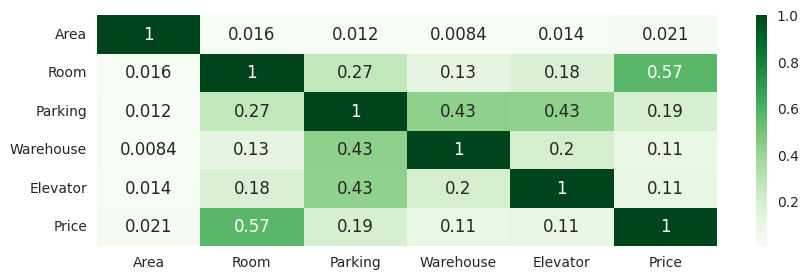

In [16]:
# Create a correlation matrix excluding the 'Address' column
column_to_exclude = 'Address'
df_without_column = df.drop(columns=[column_to_exclude])

# Create a correlation matrix
corr = df_without_column.corr()


plt.figure(figsize=(10,3)) 
sns.heatmap(corr, cmap='Greens', annot=True)


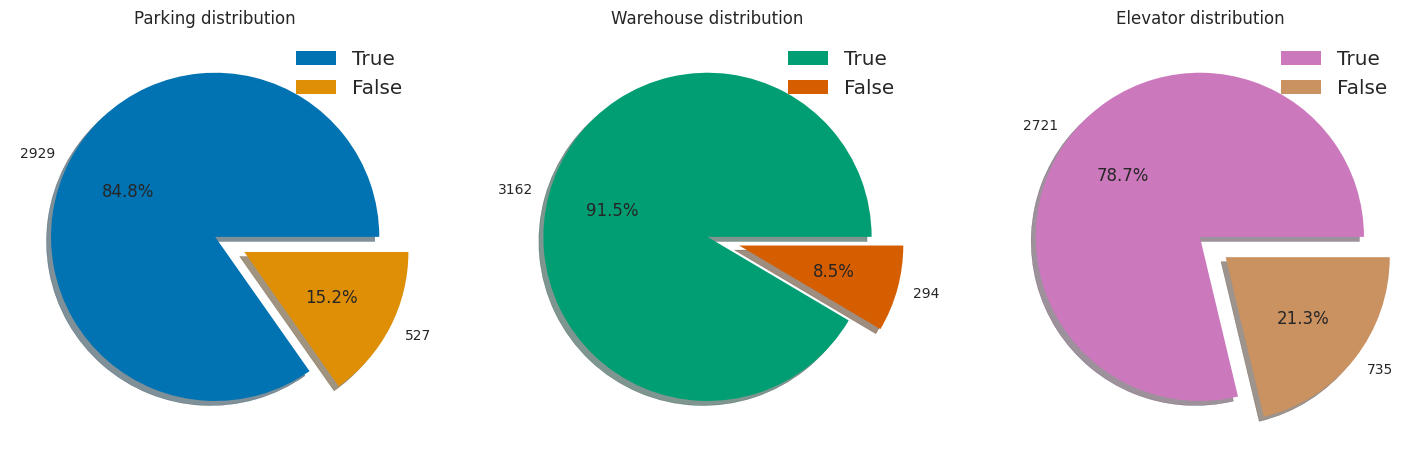

In [17]:
# Pie charts showing distributions of certain categorical features
color_palette = sns.color_palette("colorblind")

fig, ax = plt.subplots(ncols=3, figsize=(18, 6))

# Use the Color Blind 10 palette for colors
colors = [color_palette[0:2], color_palette[2:4], color_palette[4:6]]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']

for i, column in enumerate(columns):
    data = df[column].value_counts()
    ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True, autopct='%1.1f%%')
    ax[i].legend(labels=data.index, fontsize='large')
    ax[i].set_title(f'{column} distribution')

plt.show()

# 3-  Model Building by Auto ML libraries

In [18]:
# Using PyCaret to set up and compare various regression models
# This sets up the data and specifies the target column as 'Price'. Outliers are also removed in this step.
setup(df, target = "Price", session_id = 1, remove_outliers = True)

,Description,Value
0,Session id,1
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3456, 7)"
4,Transformed data shape,"(3335, 7)"
5,Transformed train set shape,"(2298, 7)"
6,Transformed test set shape,"(1037, 7)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


In [19]:
# Automatically compare models' performance
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1520040090.7558,23895048497397833728.0000,4712537916.6036,0.6802,0.4583,0.6586,0.5350
et,Extra Trees Regressor,1567473781.3556,24098884971229503488.0000,4733818252.3469,0.6794,0.4808,0.6034,0.3470
catboost,CatBoost Regressor,1506137401.9685,24704999527351070720.0000,4786461151.8806,0.6708,0.4566,0.6275,1.7220
rf,Random Forest Regressor,1554408774.6982,24774860575503360000.0000,4758115174.9880,0.6698,0.4684,0.8309,0.3910
xgboost,Extreme Gradient Boosting,1565892710.4000,26099616472451407872.0000,4927559091.2000,0.6504,0.4502,0.5339,0.2560
gbr,Gradient Boosting Regressor,1628223405.1364,26895141316738961408.0000,4967125157.8010,0.6408,0.5075,1.0000,0.2490
dt,Decision Tree Regressor,1802686608.8735,29187225442421153792.0000,5155045347.8312,0.6113,0.5557,0.8009,0.1970
knn,K Neighbors Regressor,1683747212.8000,29743672609930108928.0000,5319376665.6000,0.5973,0.4894,0.5383,0.1950
ada,AdaBoost Regressor,3268334221.6600,33805679969382338560.0000,5714483731.6488,0.5289,1.0672,2.6577,0.2320
br,Bayesian Ridge,3017328641.8436,50378892854654910464.0000,7019522255.3982,0.3099,0.8537,1.5885,0.1920


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

LGBMRegressor(random_state=1)

# 4- Manual Modeling

## Feature Engineering

In [20]:
# Convert boolean columns to integer type
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

In [21]:
# Check skewness for numeric columns and handle outliers

# Select only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Compute skewness for the numeric columns
skewness = numeric_columns.skew()

print(skewness)

Area        44
Room         1
Parking     -2
Warehouse   -3
Elevator    -1
Price        5
dtype: float64


In [22]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [23]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 237
Number of price outliers: 310
Number of outliers: 366


In [24]:
df.shape

(3456, 7)

In [25]:
df1 = df.copy()

In [26]:
# Filter the DataFrame based on the limits
filtered_df = df1[(df1['Area'] >= lower_area) & (df1['Area'] <= upper_area) & (df1['Price'] >= lower_price) & (df1['Price'] <= upper_price)]

In [27]:
filtered_df.shape

(3090, 7)

In [28]:
filtered_df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,"1,850,000,000"
1,60,1,1,1,1,Shahran,"1,850,000,000"
2,79,2,1,1,1,Pardis,"550,000,000"
3,95,2,1,1,1,Shahrake Qods,"902,500,000"
4,123,2,1,1,1,Shahrake Gharb,"7,000,000,000"
...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,"3,500,000,000"
3475,83,2,1,1,1,Niavaran,"6,800,000,000"
3476,75,2,0,0,0,Parand,"365,000,000"
3477,105,2,1,1,1,Dorous,"5,600,000,000"


In [29]:
filtered_df['Address'].nunique()

187

In [30]:
# The purpose of this code is to identify and replace addresses in the filtered_df dataframe
# that appear only once with the label 'Other'. This can be useful for data cleaning or to
# group infrequent addresses under a common category for analysis.

# Calculate the frequency of each unique 'Address' value in the 'filtered_df' dataframe.
counts = filtered_df['Address'].value_counts()

# Extract the addresses that appear only once in the dataframe.
to_replace = counts[counts == 1].index

# Replace the addresses that appear only once with the string 'Other'.
filtered_df['Address'] = filtered_df['Address'].replace(to_replace, 'Other')

In [49]:
# Separate features from the target
X = filtered_df.drop(columns = 'Price')
y = filtered_df['Price']

In [50]:
# Handle categorical variables using OneHotEncoding

categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  
)

X = preprocessor.fit_transform(X)


# very Important point


# Serialize (or "dump") the preprocessor object to a file.
# 
# Why are we doing this?
# - The `preprocessor` object (a ColumnTransformer) has been "fitted" to our data.
#   This means it has learned the structure of the training data, including the categories
#   in categorical columns, the order of columns, etc.
# 
# - When we preprocess new data in the future, we want it to be transformed in the exact same
#   way the training data was. For this, we need the preprocessor to remember its "fitted" state.
# 
# - By saving the preprocessor to a file, we're preserving its "fitted" state. This allows us 
#   to later load this pre-saved state and use the preprocessor to transform new data consistently,
#   ensuring it's in the same format as the training data was.
# 
# - This is crucial for the following reasons:
#   1. Consistency: We want to always process data in the same way.
#   2. Model compatibility: Our trained model expects input in a specific format. By ensuring 
#      new data is preprocessed the same way training data was, we ensure compatibility with the model.
#   3. Handling unseen categories: The OneHotEncoder inside the ColumnTransformer has been set up 
#      with `handle_unknown='ignore'`. By saving its fitted state, it knows which categories are 
#      "known" and can handle new unseen categories gracefully.
# 

# Save the encoder
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 222)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2472, 151)
shape of y train: (2472,)
shape of x test: (618, 151)
shape of y train: (618,)


## Hyperparameter Tuning with RandomizedSearchCV

In [34]:
# Define models and their respective hyperparameter grids


# Random Forest Regressor
rf_model = RandomForestRegressor()

# Extra Trees Regressor
et_model = ExtraTreesRegressor()

# XGBoost Regressor
xgb_model = XGBRegressor()

# CatBoost Regressor
catboost_model = CatBoostRegressor(verbose=False)

# LightGBM Regressor
lgbm_model = LGBMRegressor(verbose=-1)





# Create a dictionary to loop over
models = {
    "Random forest": rf_model,
    "Extra Trees Regressor": et_model,
    "XGBoost": xgb_model,
    "CatBoost": catboost_model,
    "Lightgbm": lgbm_model
}

# Define the hyperparameter grids for each model
parameters = {
    "Random forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [10, 20, 30, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_samples": [None, 0.5, 0.75],
        "min_impurity_decrease": [0.0, 0.01, 0.02],
        "bootstrap": [True, False]
    },
    "Extra Trees Regressor": {
        "n_estimators": [100, 200, 300],
        "max_depth": [10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "bootstrap": [True, False]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [5, 10, 15],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "gamma": [0, 0.1, 0.2]
    },
    "CatBoost": {
        "iterations": [100, 200, 300],
        "depth": [6, 8, 10],
        "learning_rate": [0.1, 0.15, 0.2],
        "l2_leaf_reg": [1, 3, 5],
        "bagging_temperature": [0.5, 1.0, 1.5],
        "early_stopping_rounds": [10, 20, 30],
        "border_count": [32, 64, 128],
        "grow_policy": ["SymmetricTree", "Depthwise", "Lossguide"]
    },
    "Lightgbm": {
        "n_estimators": [100, 200],
        "max_depth": [5, 10],
        "learning_rate": [0.1, 0.2],
        "num_leaves": [10, 15],
        "lambda_l2": [0.05, 0.1],
        "min_child_samples": [10, 20],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "boosting_type": ["gbdt", "dart", "goss"]
    }
}
 


            
            

    

In [35]:
# Function to search for best parameters and return evaluation metrics



def parameter_finder(model_name, model, parameters):
    

    
    
    
    random_search = RandomizedSearchCV(model, 
                                      param_distributions=parameters, 
                                      n_iter=100,  # You can adjust this number based on how many iterations you'd like.
                                      refit=True, 
                                      cv=KFold(shuffle=True, random_state=1), 
                                      n_jobs=-1,
                                      random_state=1)  # Random state for reproducibility

    random_search_fit = random_search.fit(X_train, y_train)
    y_train_pred = random_search_fit.predict(X_train)
    y_pred = random_search_fit.predict(X_test)

    train_score = random_search_fit.score(X_train, y_train)
    test_score = random_search_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    model_name = str(model).split('(')[0]
    
    
    
    result_dict = {
        'Model Name': model_name,
        'Best Parameters': random_search.best_params_,
        'Train Score': train_score,
        'Test Score': test_score,
        'RMSE': RMSE,
        'MAE': MAE,
        'R2': R2
    }
    
    

    
    return result_dict

In [36]:
# Loop through each model, find the best parameters, and store the results
all_results = {}

for model_name, model in tqdm(models.items(), desc="Model Progress"):
    result_dict = parameter_finder(model_name, model, parameters[model_name])
    all_results[model_name] = result_dict


Model Progress:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] lambda_l2 is set=0.05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05
[LightGBM] [Warning] lambda_l2 is set=0.05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05
[LightGBM] [Warning] lambda_l2 is set=0.05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05
[LightGBM] [Warning] lambda_l2 is set=0.05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05
[LightGBM] [Warning] lambda_l2 is set=0.05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05
[LightGBM] [Warning] lambda_l2 is set=0.05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05
[LightGBM] [Warning] lambda_l2 is set=0.05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05
[LightGBM] [Warning] lambda_l2 is set=0.05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05
[LightGBM] [Warning] lambda_l2 is set=0.05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05
[LightGBM] [Warning] lambda_l2 is set=0.05, re

In [37]:
# Display the results
all_results

{'Random forest': {'Model Name': 'RandomForestRegressor',
  'Best Parameters': {'n_estimators': 200,
   'min_samples_split': 10,
   'min_samples_leaf': 1,
   'min_impurity_decrease': 0.0,
   'max_samples': None,
   'max_depth': None,
   'bootstrap': True},
  'Train Score': 0.935173152650748,
  'Test Score': 0.8396988538417407,
  'RMSE': 1101778593.5287523,
  'MAE': 652198395.9624844,
  'R2': 0.8396988538417407},
 'Extra Trees Regressor': {'Model Name': 'ExtraTreesRegressor',
  'Best Parameters': {'n_estimators': 100,
   'min_samples_split': 10,
   'max_depth': 30,
   'bootstrap': True},
  'Train Score': 0.9202042564555598,
  'Test Score': 0.8409179454027604,
  'RMSE': 1097581080.0441241,
  'MAE': 661387761.5177581,
  'R2': 0.8409179454027604},
 'XGBoost': {'Model Name': 'XGBRegressor',
  'Best Parameters': {'subsample': 1.0,
   'n_estimators': 300,
   'max_depth': 5,
   'learning_rate': 0.2,
   'gamma': 0.2,
   'colsample_bytree': 0.6},
  'Train Score': 0.950792577234368,
  'Test Score

# 5- Model Evaluation 

In [39]:
wandb.login()

wandb: Currently logged in as: mbhosseini70. Use `wandb login --relogin` to force relogin


True

In [40]:
# Function to evaluate a model and log results to wandb

def evaluate_model(model_name, model):

    start = time.time()

    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Use cross-validation to get train score
    train_scores = cross_val_score(model, X_train, y_train, cv=KFold(shuffle=True, random_state=1), n_jobs=-1)
    train_score = np.mean(train_scores)
    
    # Predict on test data
    y_pred = model.predict(X_test)

    test_score = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    model_name = str(model).split('(')[0]

    end = time.time()

    result_dict = {
        'Model Name': model_name,
        'Train Score': train_score,
        'Test Score': test_score,
        'RMSE': RMSE,
        'MAE': MAE,
        'R2': R2,
        'Training Time (seconds)': end - start
    }

    # Log results to wandb
    wandb.log({
        'Train Score': train_score,
        'Test Score': test_score,
        'RMSE': RMSE,
        'MAE': MAE,
        'R2': R2,
        'Training Time (seconds)': end - start,
    })

    return result_dict

In [41]:
# Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=1,
    min_impurity_decrease=0.0,
    max_samples=None,
    max_depth=None,
    bootstrap=True,
    random_state=42
)

# Extra Trees Regressor
et_model = ExtraTreesRegressor(
    n_estimators=100,
    min_samples_split=10,
    max_depth=30,
    bootstrap=True,
    random_state=42
)

# XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.2,
    subsample=1.0,
    colsample_bytree=0.6,
    gamma=0.2,
    random_state=42
)

# CatBoost Regressor
catboost_model = CatBoostRegressor(
    iterations=300,
    depth=6,
    learning_rate=0.2,
    l2_leaf_reg=3,
    grow_policy='Depthwise',
    early_stopping_rounds=10,
    bagging_temperature=1.0,
    border_count=128,
    random_state=42,
    verbose=False
)

# LightGBM Regressor
lgbm_model = LGBMRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.2,
    subsample=0.6,
    num_leaves=10,
    min_child_samples=10,
    lambda_l2=0.1,
    boosting_type='gbdt',
    colsample_bytree=1.0,
    random_state=42
)

# Create a dictionary to loop over
models = {
    "Random forest": rf_model,
    "Extra Trees Regressor": et_model,
    "XGBoost": xgb_model,
    "CatBoost": catboost_model,
    "Lightgbm": lgbm_model
}

# Loop through each model and evaluate
all_results = {}

for model_name, model in tqdm(models.items(), desc="Model Progress"):
    wandb.init(project='regression_model', name=model_name)
    
    result_dict = evaluate_model(model_name, model)
    
    all_results[model_name] = result_dict

    wandb.finish()

Model Progress:   0%|          | 0/5 [00:00<?, ?it/s]

MAE,▁
R2,▁
RMSE,▁
Test Score,▁
Train Score,▁
Training Time (seconds),▁
MAE,647080223.0006
R2,0.84122
RMSE,1096548798.25586
Test Score,0.84122
Train Score,0.80295


MAE,▁
R2,▁
RMSE,▁
Test Score,▁
Train Score,▁
Training Time (seconds),▁
MAE,656270252.6291
R2,0.84215
RMSE,1093317787.35827
Test Score,0.84215
Train Score,0.81166


MAE,▁
R2,▁
RMSE,▁
Test Score,▁
Train Score,▁
Training Time (seconds),▁
MAE,573098066.22492
R2,0.87567
RMSE,970333169.79242
Test Score,0.87567
Train Score,0.85259


MAE,▁
R2,▁
RMSE,▁
Test Score,▁
Train Score,▁
Training Time (seconds),▁
MAE,594625172.87248
R2,0.8695
RMSE,994111611.58913
Test Score,0.8695
Train Score,0.8605


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


MAE,▁
R2,▁
RMSE,▁
Test Score,▁
Train Score,▁
Training Time (seconds),▁
MAE,711083748.96006
R2,0.81065
RMSE,1197449776.8923
Test Score,0.81065
Train Score,0.79642


In [42]:
model_names = list(all_results.keys())
train_scores = [all_results[model]['Train Score'] for model in model_names]
test_scores = [all_results[model]['Test Score'] for model in model_names]





# Creating the figure
fig = go.Figure()

# Adding the train scores line graph
fig.add_trace(go.Scatter(x=model_names, y=train_scores, mode='lines+markers', name='Train Score'))

# Adding the test scores line graph
fig.add_trace(go.Scatter(x=model_names, y=test_scores, mode='lines+markers', name='Test Score'))

# Updating layout for better presentation
fig.update_layout(title='Train and Test Scores for Different Models',
                 xaxis_title='Model Name',
                 yaxis_title='Score',
                 legend_title='Scores')

fig.update_yaxes(range=[0, 1])
# Display the figure
fig.show()

In [43]:
# I selected Both the CatBoost regression model and XGBoost regression model because of its higher accuracy and better generalization capabilities.
# I will use both in my web application

In [44]:
model_name = "CatBoost"
catboost_model.save_model(f"{model_name}_model.cbm")

In [45]:
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']